In [3]:
!pip install pinecone sentence-transformers datasets faiss-cpu transformers openai llama-index llama-index-vector-stores-pinecone -qqq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [33]:
# 이후에 라마인덱스도 활용할 것이기에 OPENAI Key를 설정해야 한다
# 파인콘을 활용할 것이기 때문에 파인콘 API KEY 등록한다.
import os
os.environ["OPENAI_API_KEY"] = "FIXME"
os.environ['PINECORN_API_KEY'] = "FIXME"

openai_api_key = os.environ["OPENAI_API_KEY"]
pinecone_api_key = os.environ['PINECORN_API_KEY']

In [10]:
from pinecone import Pinecone, ServerlessSpec

pc = Pinecone(api_key=pinecone_api_key)

index_name = "llm-book"

# pc.create_index(
#     name=index_name,
#     dimension=768,
#     metric="cosine",
#     spec=ServerlessSpec(
#         cloud="aws",
#         region="us-east-1"
#     )
# )

index = pc.Index(index_name)

In [5]:
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
# 임베딩 모델 불러오기
sentence_model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')
# 데이터셋 불러오기
klue_dp_train = load_dataset('klue', 'dp', split='train[:100]')

embeddings = sentence_model.encode(klue_dp_train['sentence'])

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/336k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/967k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.12M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/618k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [6]:
# 파이썬 기본 데이터 타입으로 변경
embeddings = embeddings.tolist()
# {"id": 문서 ID(str), "values": 벡터 임베딩(List[float]), "metadata": 메타 데이터(dict) ) 형태로 데이터 준비
insert_data = []
for idx, (embedding, text) in enumerate(zip(embeddings, klue_dp_train['sentence'])):
  insert_data.append({"id": str(idx), "values": embedding, "metadata": {'text': text}})

insert_data

Output hidden; open in https://colab.research.google.com to view.

In [11]:
upsert_response = index.upsert(vectors = insert_data, namespace='llm-book-sub')

In [13]:
query_response = index.query(
    namespace='llm-book-sub', # 검색할 네임스페이스
    top_k=10, # 몇 개의 결과를 반환할지
    include_values=True, # 벡터 임베딩 반환 여부
    include_metadata=True, # 메타 데이터 반환 여부
    vector=embeddings[0] # 검색할 벡터 임베딩
)
query_response

{'matches': [{'id': '0',
              'metadata': {'text': '해당 그림을 보면 디즈니 공주들이 브리트니 스피어스의 앨범이나 뮤직비디오, '
                                   '화보 속 모습을 똑같이 재연했다.'},
              'score': 1.00000012,
              'values': [-1.10073376,
                         0.220477909,
                         0.742353499,
                         0.407552123,
                         0.408453,
                         -0.566834807,
                         0.120408639,
                         0.961137235,
                         0.122867584,
                         0.0803636536,
                         -0.269530624,
                         1.06352234,
                         0.799612761,
                         -0.652637124,
                         0.280845672,
                         0.298936605,
                         0.349924,
                         -0.300159246,
                         -0.220104486,
                         0.143384948,
                         0.49921155,
      

In [14]:
new_text = '파인콘에서 문서 수정 및 삭제'
new_embedding = sentence_model.encode(new_text).tolist()
# 업데이트
# update_response = index.update(
#     id= '72',
#     values=new_embedding,
#     set_metadata={'text': new_text},
#     namespace='llm-book-sub'
# )

# 삭제
delete_response = index.delete(ids=['72'], namespace='llm-book-sub')

In [16]:
# 파인콘 기본 설정
from pinecone import Pinecone, ServerlessSpec

pc = Pinecone(api_key=pinecone_api_key)
# pc.create_index(
#     "quickstart", dimension=1536, metric="euclidean", spec=ServerlessSpec("aws", "us-east-1")
# )
pinecone_index = pc.Index("quickstart")


In [18]:
# 라마인덱스에 파인콘 인덱스 연결
from llama_index.core import VectorStoreIndex
from llama_index.vector_stores.pinecone import PineconeVectorStore
from llama_index.core import StorageContext
from llama_index.core.schema import Document

# 데이터셋 로딩
klue_dp_train = load_dataset('klue', 'dp', split='train[:100]')

# 문장 리스트 가져오기
sentences = klue_dp_train['sentence']

# Document 리스트로 변환
documents = [Document(text=sent) for sent in sentences]

vector_store = PineconeVectorStore(pinecone_index=pinecone_index)
storage_context = StorageContext.from_defaults(vector_store=vector_store)
index = VectorStoreIndex.from_documents(
    documents, storage_context=storage_context
)

Upserted vectors:   0%|          | 0/100 [00:00<?, ?it/s]

In [19]:
from datasets import load_dataset

dataset = load_dataset("poloclub/diffusiondb", "2m_first_1k", split='train')

example_index = 867
original_image = dataset[example_index]['image']
original_prompt = dataset[example_index]['prompt']
print(original_prompt)

README.md:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

diffusiondb.py:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

The repository for poloclub/diffusiondb contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/poloclub/diffusiondb.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


part-000002.zip:   0%|          | 0.00/581M [00:00<?, ?B/s]

metadata.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

cute fluffy baby cat rabbit lion hybrid mixed creature character concept, with long flowing mane blowing in the wind, long peacock feather tail, wearing headdress of tribal peacock feathers and flowers, detailed painting, renaissance, 4 k 


In [34]:
import requests
import base64
from io import BytesIO

def make_base64(image):
  buffered = BytesIO()
  image.save(buffered, format="JPEG")
  img_str = base64.b64encode(buffered.getvalue()).decode('utf-8')
  return img_str

def generate_description_from_image_gpt4(prompt, image64):
  headers = {
      "Content-Type": "application/json",
      "Authorization": f"Bearer {openai_api_key}"
  }
  payload = {
      "model": "gpt-4o",
      "messages": [
        {
          "role": "user",
          "content": [
            {
              "type": "text",
              "text": prompt
            },
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{image64}"
              }
            }
          ]
        }
      ],
      "max_tokens": 300
  }
  response_oai = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
  result = response_oai.json()['choices'][0]['message']['content']
  return result

In [35]:
image_base64 = make_base64(original_image)
described_result = generate_description_from_image_gpt4("Describe provided image", image_base64)
described_result

'The image depicts a majestic lion with a vibrant, colorful mane that resembles peacock feathers. The background features a lush, natural setting with flowers and foliage, giving the scene a mystical and fantastical feel. The lion appears regal and serene, with the peacock-like mane adding an element of whimsy and allure to its appearance.'

In [36]:
import os
from openai import OpenAI
from pinecone import Pinecone, ServerlessSpec

pc = Pinecone(api_key=pinecone_api_key)
client = OpenAI()

In [23]:
print(pc.list_indexes())

index_name = "llm-multimodal"
try:
  pc.create_index(
    name=index_name,
    dimension=512,
    metric="cosine",
    spec=ServerlessSpec(
      "aws", "us-east-1"
    )
  )
  print(pc.list_indexes())
except:
  print("Index already exists")
index = pc.Index(index_name)

[{
    "name": "llm-multimodal",
    "metric": "cosine",
    "host": "llm-multimodal-nm639c1.svc.aped-4627-b74a.pinecone.io",
    "spec": {
        "serverless": {
            "cloud": "aws",
            "region": "us-east-1"
        }
    },
    "status": {
        "ready": true,
        "state": "Ready"
    },
    "vector_type": "dense",
    "dimension": 512,
    "deletion_protection": "disabled",
    "tags": null
}, {
    "name": "quickstart",
    "metric": "euclidean",
    "host": "quickstart-nm639c1.svc.aped-4627-b74a.pinecone.io",
    "spec": {
        "serverless": {
            "cloud": "aws",
            "region": "us-east-1"
        }
    },
    "status": {
        "ready": true,
        "state": "Ready"
    },
    "vector_type": "dense",
    "dimension": 1536,
    "deletion_protection": "disabled",
    "tags": null
}, {
    "name": "llm-book",
    "metric": "cosine",
    "host": "llm-book-nm639c1.svc.aped-4627-b74a.pinecone.io",
    "spec": {
        "serverless": {
        

In [24]:
import torch
from tqdm.auto import trange
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, CLIPTextModelWithProjection

device = "cuda" if torch.cuda.is_available() else "cpu"

text_model = CLIPTextModelWithProjection.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")

tokens = tokenizer(dataset['prompt'], padding=True, return_tensors="pt", truncation=True)
batch_size = 16
text_embs = []
for start_idx in trange(0, len(dataset), batch_size):
    with torch.no_grad():
        outputs = text_model(input_ids = tokens['input_ids'][start_idx:start_idx+batch_size],
                        attention_mask = tokens['attention_mask'][start_idx:start_idx+batch_size])
        text_emb_tmp = outputs.text_embeds
    text_embs.append(text_emb_tmp)
text_embs = torch.cat(text_embs, dim=0)
text_embs.shape # (1000, 512)

  0%|          | 0/63 [00:00<?, ?it/s]

torch.Size([1000, 512])

In [25]:
input_data = []
for id_int, emb, prompt in zip(range(0, len(dataset)), text_embs.tolist(), dataset['prompt']):
  input_data.append(
      {
          "id": str(id_int),
          "values": emb,
          "metadata": {
              "prompt": prompt
          }
      }
  )

index.upsert(
  vectors=input_data
)

{'upserted_count': 1000}

In [26]:
from transformers import AutoProcessor, CLIPVisionModelWithProjection

vision_model = CLIPVisionModelWithProjection.from_pretrained("openai/clip-vit-base-patch32")
processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")

inputs = processor(images=original_image, return_tensors="pt")

outputs = vision_model(**inputs)
image_embeds = outputs.image_embeds

search_results = index.query(
  vector=image_embeds[0].tolist(),
  top_k=3,
  include_values=False,
  include_metadata=True
)
searched_idx = int(search_results['matches'][0]['id'])

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [27]:
search_results

# {'matches': [{'id': '918',
#               'metadata': {'prompt': 'cute fluffy bunny cat lion hybrid mixed '
#                                      'creature character concept, with long '
#                                      'flowing mane blowing in the wind, long '
#                                      'peacock feather tail, wearing headdress '
#                                      'of tribal peacock feathers and flowers, '
#                                      'detailed painting, renaissance, 4 k '},
#               'score': 0.372838408,
#               'values': []},
#              {'id': '867',
#               'metadata': {'prompt': 'cute fluffy baby cat rabbit lion hybrid '
#                                      'mixed creature character concept, with '
#                                      'long flowing mane blowing in the wind, '
#                                      'long peacock feather tail, wearing '
#                                      'headdress of tribal peacock feathers and '
#                                      'flowers, detailed painting, renaissance, '
#                                      '4 k '},
#               'score': 0.371655703,
#               'values': []},
# ...

{'matches': [{'id': '918',
              'metadata': {'prompt': 'cute fluffy bunny cat lion hybrid mixed '
                                     'creature character concept, with long '
                                     'flowing mane blowing in the wind, long '
                                     'peacock feather tail, wearing headdress '
                                     'of tribal peacock feathers and flowers, '
                                     'detailed painting, renaissance, 4 k '},
              'score': 0.37472102,
              'values': []},
             {'id': '817',
              'metadata': {'prompt': 'cute fluffy baby cat lion hybrid mixed '
                                     'creature character concept, with long '
                                     'flowing mane blowing in the wind, long '
                                     'peacock feather tail, wearing headdress '
                                     'of tribal peacock feathers and flowers, '
           

In [28]:
from PIL import Image

def generate_image_dalle3(prompt):
  response_oai = client.images.generate(
    model="dall-e-3",
    prompt=str(prompt),
    size="1024x1024",
    quality="standard",
    n=1,
  )
  result = response_oai.data[0].url
  return result

def get_generated_image(image_url):
  generated_image = requests.get(image_url).content
  image_filename = 'gen_img.png'
  with open(image_filename, "wb") as image_file:
      image_file.write(generated_image)
  return Image.open(image_filename)

In [29]:
# GPT-4o가 만든 프롬프트로 이미지 생성
gpt_described_image_url = generate_image_dalle3(described_result)
gpt4o_prompt_image = get_generated_image(gpt_described_image_url)
gpt4o_prompt_image

Output hidden; open in https://colab.research.google.com to view.

In [30]:
# 원본 프롬프트로 이미지 생성
original_prompt_image_url = generate_image_dalle3(original_prompt)
original_prompt_image = get_generated_image(original_prompt_image_url)
original_prompt_image

Output hidden; open in https://colab.research.google.com to view.

In [31]:
# 이미지 임베딩으로 검색한 유사 프롬프트로 이미지 생성
searched_prompt_image_url = generate_image_dalle3(dataset[searched_idx]['prompt'])
searched_prompt_image = get_generated_image(searched_prompt_image_url)
searched_prompt_image

Output hidden; open in https://colab.research.google.com to view.

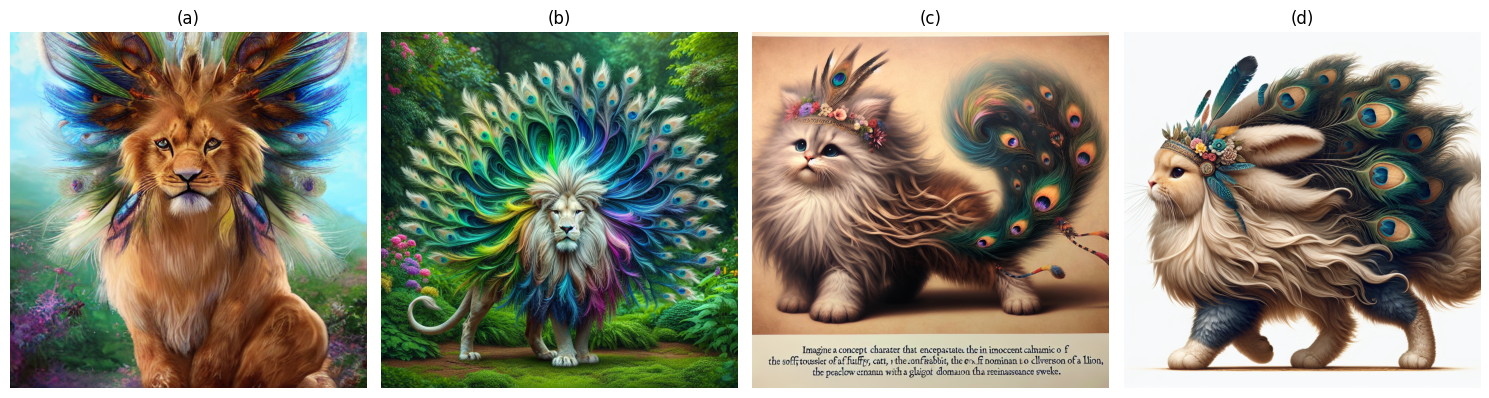

In [32]:
import matplotlib.pyplot as plt

images = [original_image, gpt4o_prompt_image, original_prompt_image, searched_prompt_image]
titles = ['(a)', '(b)', '(c)', '(d)']

fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(title)

plt.tight_layout()
plt.show()